<a href="https://colab.research.google.com/github/yusrayalavuz/airline-passenger-analysis/blob/main/AirlinePassengerSatisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kız Başına Veri Analizi Bootcamp | 1. Final Case Ödevi  
## Airline Passenger Satisfaction Dataset Analizi


## 1. Veri Seti Seçimi & Tanımı

Bu analizde, müşteri deneyimi ve memnuniyetini anlamak amacıyla Airline Passenger Satisfaction Dataset seçilmiştir. Bu veri seti, yolcuların demografik bilgilerini, uçuş özelliklerini ve çeşitli hizmetlere verdikleri derecelendirmelerle birlikte genel memnuniyet durumlarını içermektedir.

- Veri seti, yolcuların uçuş deneyimleriyle ilgili geniş kapsamlı ve detaylı bilgileri içermektedir.  
- Hem sayısal hem kategorik veriler dengeli şekilde mevcuttur, bu da kapsamlı analizler yapmaya olanak tanır.  
- Eksik veri ve aykırı değer analizleri için uygun büyüklükte ve çeşitlilikte bir veri setidir.  
- Hedef değişken `satisfaction` sayesinde memnuniyet analizleri ve sınıflandırma modelleri oluşturulabilir.  
- İlgili veri seti, havayolu sektörüne yönelik müşteri deneyimini analiz etmek isteyenler için oldukça güncel ve kapsamlıdır.  

Bu nedenlerle, analiz ve raporlama için bu veri setini tercih ettim.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import math
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("archive/train.csv")
df = df.copy()
df.head()


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [ ]:
print(df.columns)

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


In [ ]:
#Veri setindeki değişkenleri kategorik ve sayısal olarak ayırdım.

categorical_columns = [
    "Gender",
    "Customer Type",
    "Type of Travel",
    "Class",
    "satisfaction"
]


In [ ]:
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns.tolist()


## 2. İstatistiksel Özet


In [ ]:
# Sayısal değişkenler için özet

df.describe().T


,count,mean,std,min,25%,50%,75%,max
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.00,4.0,5.00,5.0


In [ ]:
# Kategorik değişkenler için özet

for col in categorical_columns:
    counts = df[col].value_counts()
    proportions = df[col].value_counts(normalize=True).round(3)
    summary = pd.DataFrame({'Count': counts, 'Proportion': proportions})
    display(summary)


,Count,Proportion
Gender,,
Female,52727,0.507
Male,51177,0.493


,Count,Proportion
Customer Type,,
Loyal Customer,84923,0.817
disloyal Customer,18981,0.183


,Count,Proportion
Type of Travel,,
Business travel,71655,0.69
Personal Travel,32249,0.31


,Count,Proportion
Class,,
Business,49665,0.478
Eco,46745,0.450
Eco Plus,7494,0.072


,Count,Proportion
satisfaction,,
neutral or dissatisfied,58879,0.567
satisfied,45025,0.433


## 3. Eksik Değer Analizi

In [ ]:
df.isnull().values.any()

True

In [ ]:
missing_values = df.isnull().sum() #Eksik veri kontrol etme
print(missing_values)

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64


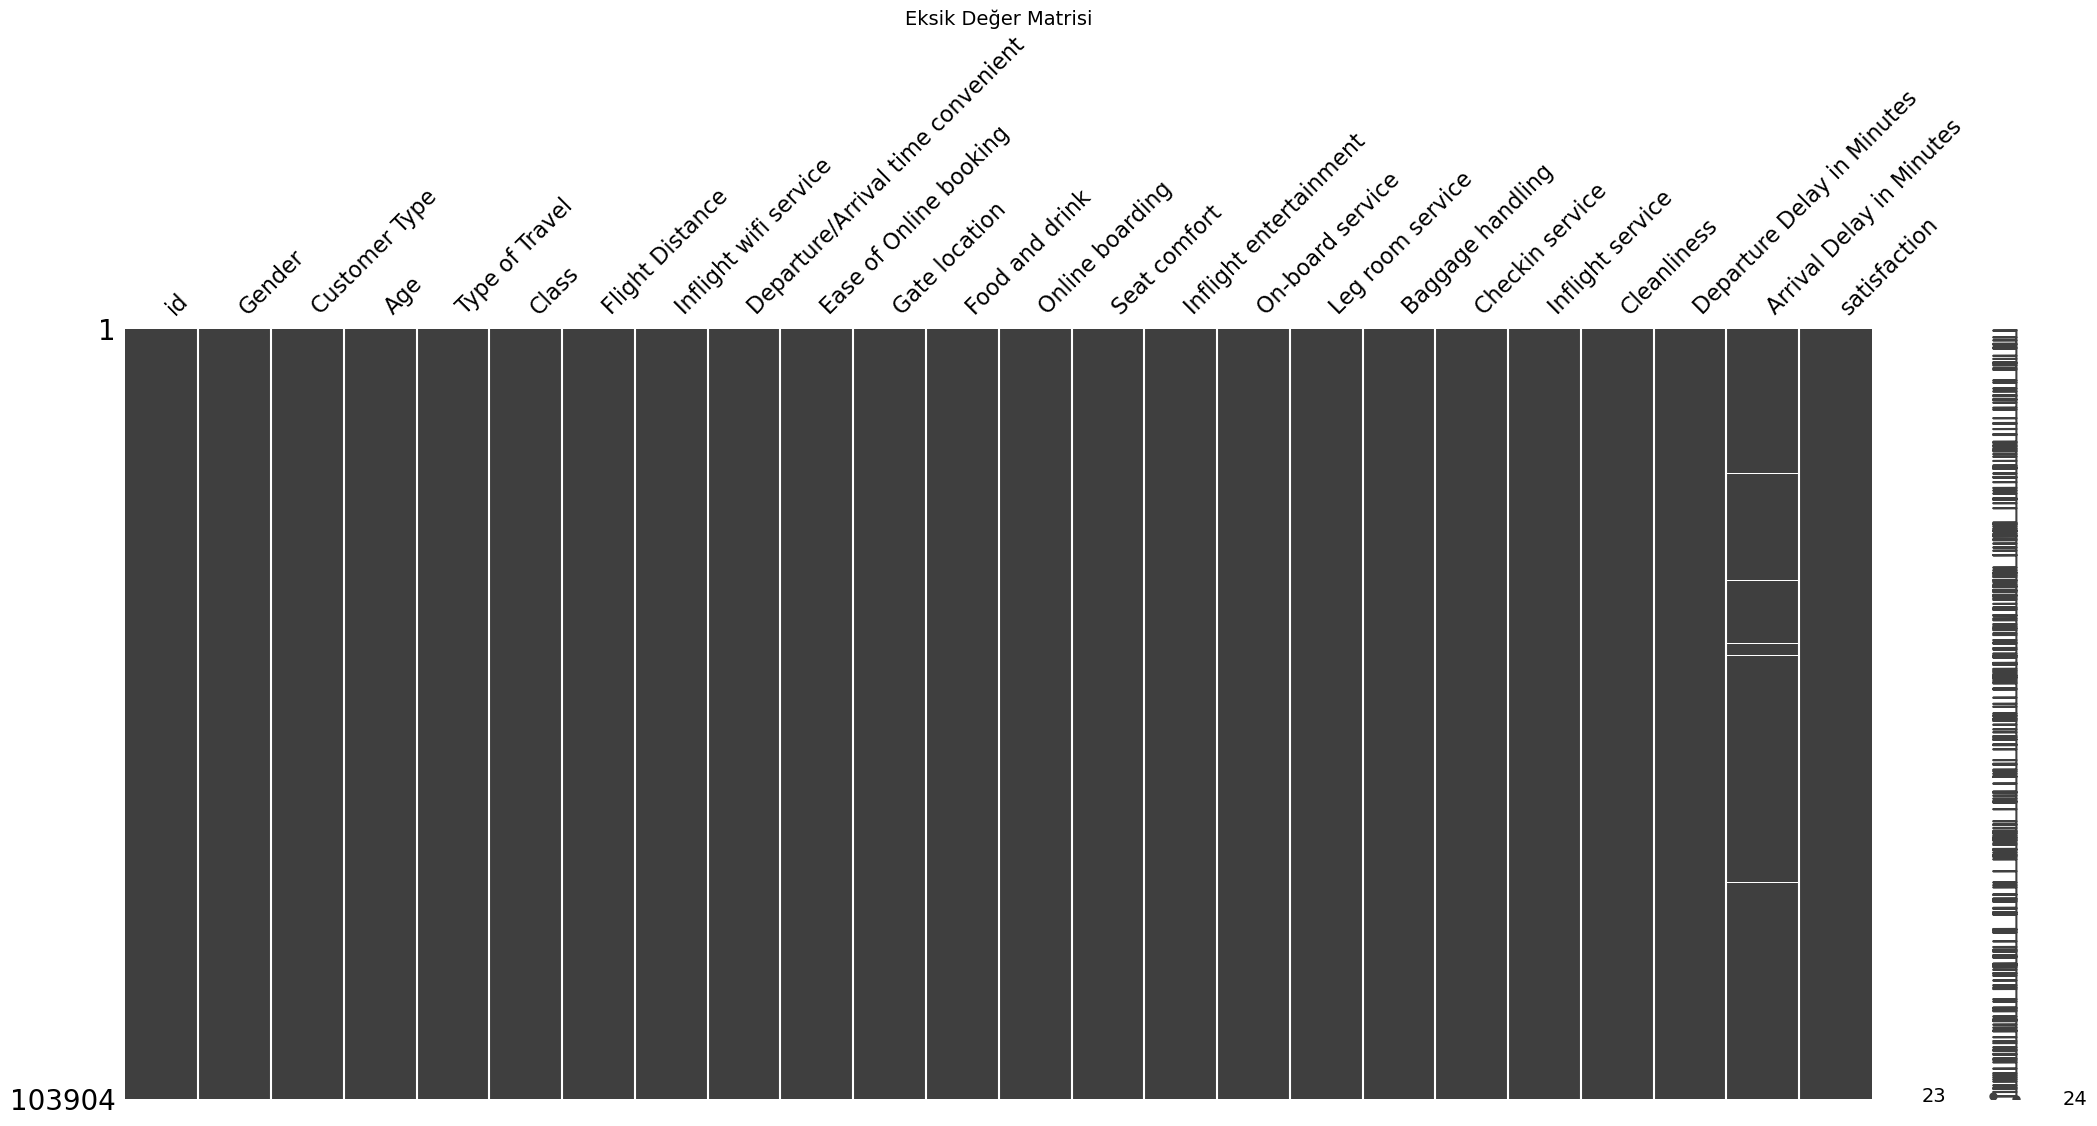

In [ ]:
# Eksik değerlerin veri setindeki konumunu gösterir
msno.matrix(df)
plt.title("Eksik Değer Matrisi", fontsize=14)
plt.show()

Bu analiz sonucunda, eksik veri yalnızca `Arrival Delay in Minutes` sütununda görülmektedir. Eksik değer sayısı oldukça az ve toplam veri setine oranı %0.3’ün altındadır. Bu nedenle, veri kaybı riski minimum düzeyde olacağı için ilgili satırları silmeyi tercih ettim


In [ ]:
df.dropna(subset=['Arrival Delay in Minutes'], inplace=True)


In [ ]:
missing_values = df.isnull().sum() #Eksik veri kontrol etme
print(missing_values)
print(f"Temizlenmiş veri seti boyutu: {df.shape}")

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64
Temizlenmiş veri seti boyutu: (103594, 24)


## 4. Aykırı Değer Analizi


In [ ]:
outlier_columns = []

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]

    outlier_count = outliers.shape[0]
    outlier_ratio = outlier_count / df.shape[0] * 100

    if outlier_count > 0:
        outlier_columns.append(col)
        print(f"{col}: {outlier_count} aykırı değer (%{outlier_ratio:.2f})")


Flight Distance: 2287 aykırı değer (%2.21)
Checkin service: 12853 aykırı değer (%12.41)
Departure Delay in Minutes: 14428 aykırı değer (%13.93)
Arrival Delay in Minutes: 13954 aykırı değer (%13.47)


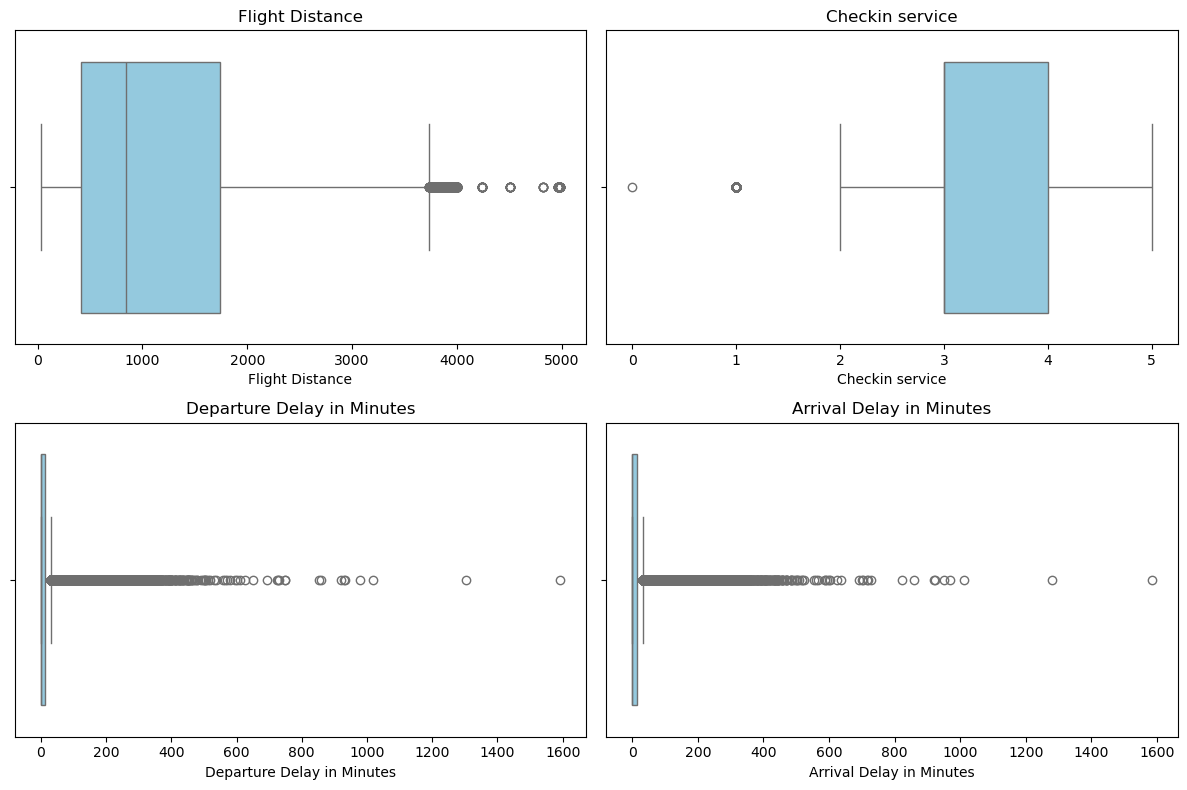

In [ ]:
cols = 2
rows = math.ceil(len(outlier_columns) / cols)

plt.figure(figsize=(cols * 6, rows * 4))

for i, col in enumerate(outlier_columns, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(col)

plt.tight_layout()
plt.show()

## 5. Görselleştirme


### Kategorik Değişkenlerin Görselleştirilmesi

Bu adımda, veri setindeki kategorik değişkenlerin dağılımlarını daha anlaşılır hale getirmek amacıyla çubuk grafikleri (countplot) ve pasta grafiklerini (pie chart) birlikte kullandım. Her bir değişken için sol tarafta sayısal dağılımı, sağ tarafta ise yüzdesel oranları gösterilmiştir.

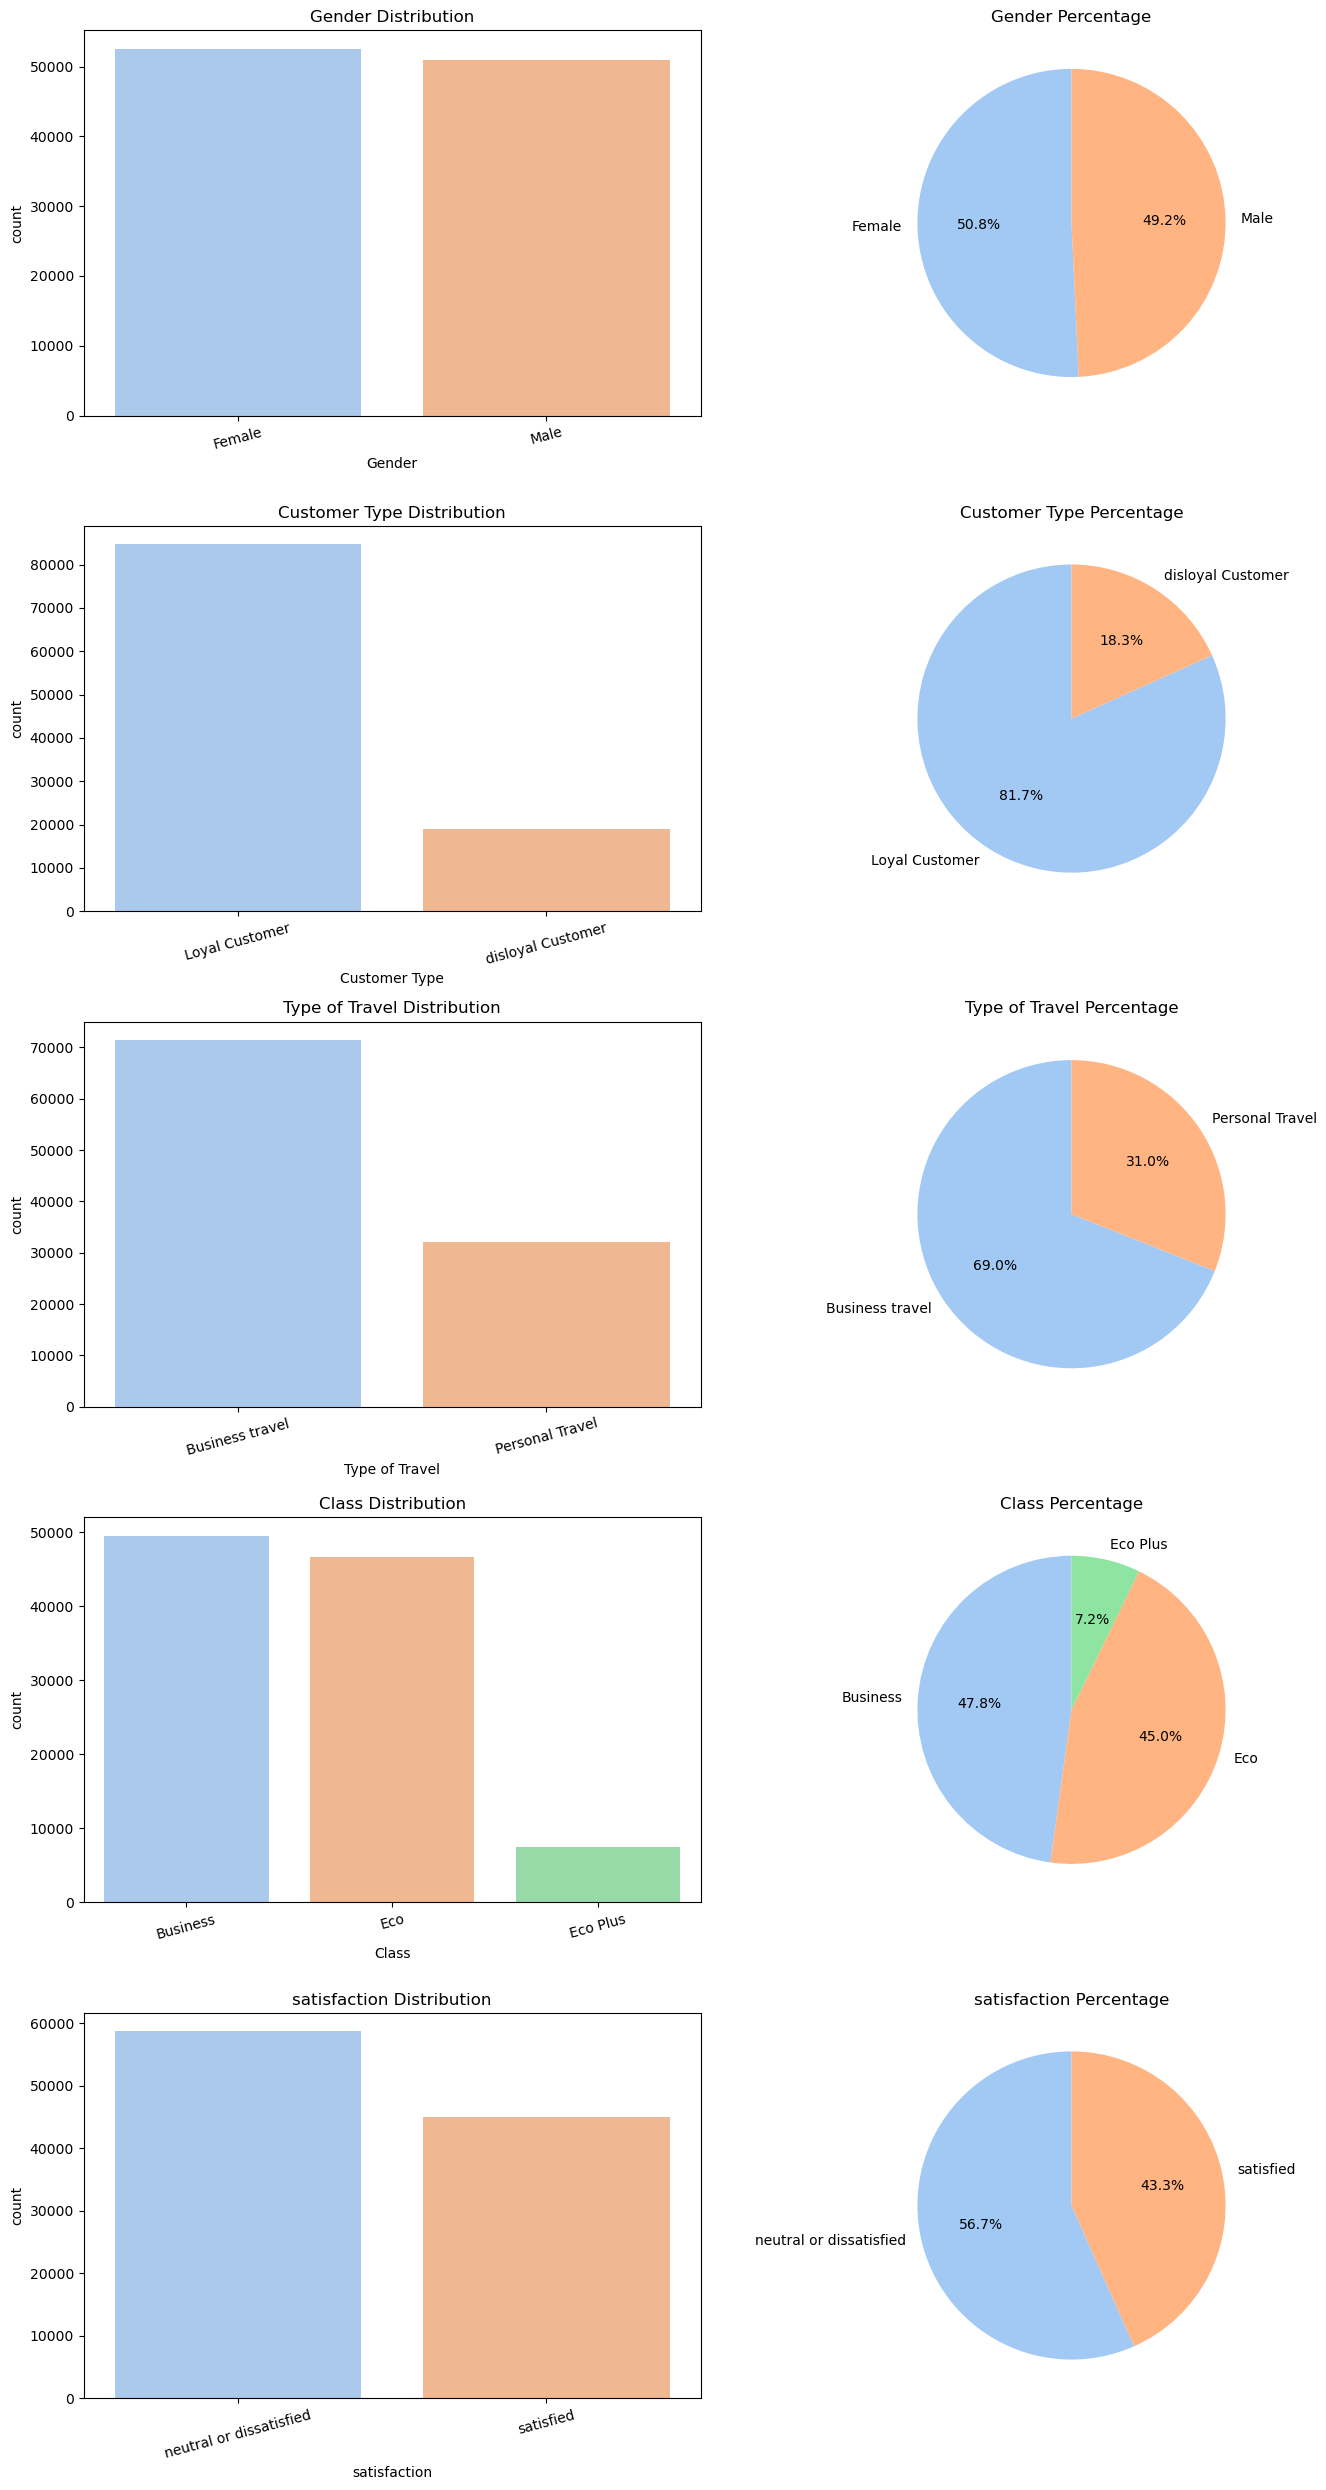

In [ ]:
plt.figure(figsize=(14, len(categorical_columns) * 5))

for i, col in enumerate(categorical_columns):
    categories = df[col].value_counts().index
    colors = sns.color_palette('pastel')[:len(categories)]

    # Countplot (left)
    plt.subplot(len(categorical_columns), 2, 2 * i + 1)
    sns.countplot(data=df, x=col, order=categories, palette=dict(zip(categories, colors)))
    plt.title(f"{col} Distribution", fontsize=12)
    plt.xticks(rotation=15)

    # Pie chart (right)
    plt.subplot(len(categorical_columns), 2, 2 * i + 2)
    df[col].value_counts(normalize=True).loc[categories].plot(
        kind='pie',
        autopct='%1.1f%%',
        startangle=90,
        colors=colors
    )
    plt.title(f"{col} Percentage")
    plt.ylabel("")


plt.tight_layout()
plt.show()


Bu görselleştirmeler sayesinde:

- Gender dağılımında kadın ve erkek yolcu sayısının neredeyse eşit olduğu,

- Customer Type değişkeninde sadık (loyal) müşteri oranının oldukça yüksek olduğu,

- Type of Travel değişkeninde iş amaçlı seyahatlerin baskın olduğu,

- Class değişkeninde Business ve Eco sınıfı yolcuların çoğunlukta olduğu,

- Satisfaction (memnuniyet) değişkeninde ise memnun olmayan veya nötr yolcuların daha fazla olduğu

gözlemlenmiştir.

### Sayısal Değişkenlerin Görselleştirilmesi

Sayısal değişkenlerin dağılımını analiz edebilmek adına her bir değişken için histogram grafikleri oluşturulmuştur. Ayrıca, dağılımın şeklini daha iyi anlamak için histogramların üzerine kde (Kernel Density Estimation) eğrisi de eklenmiştir.

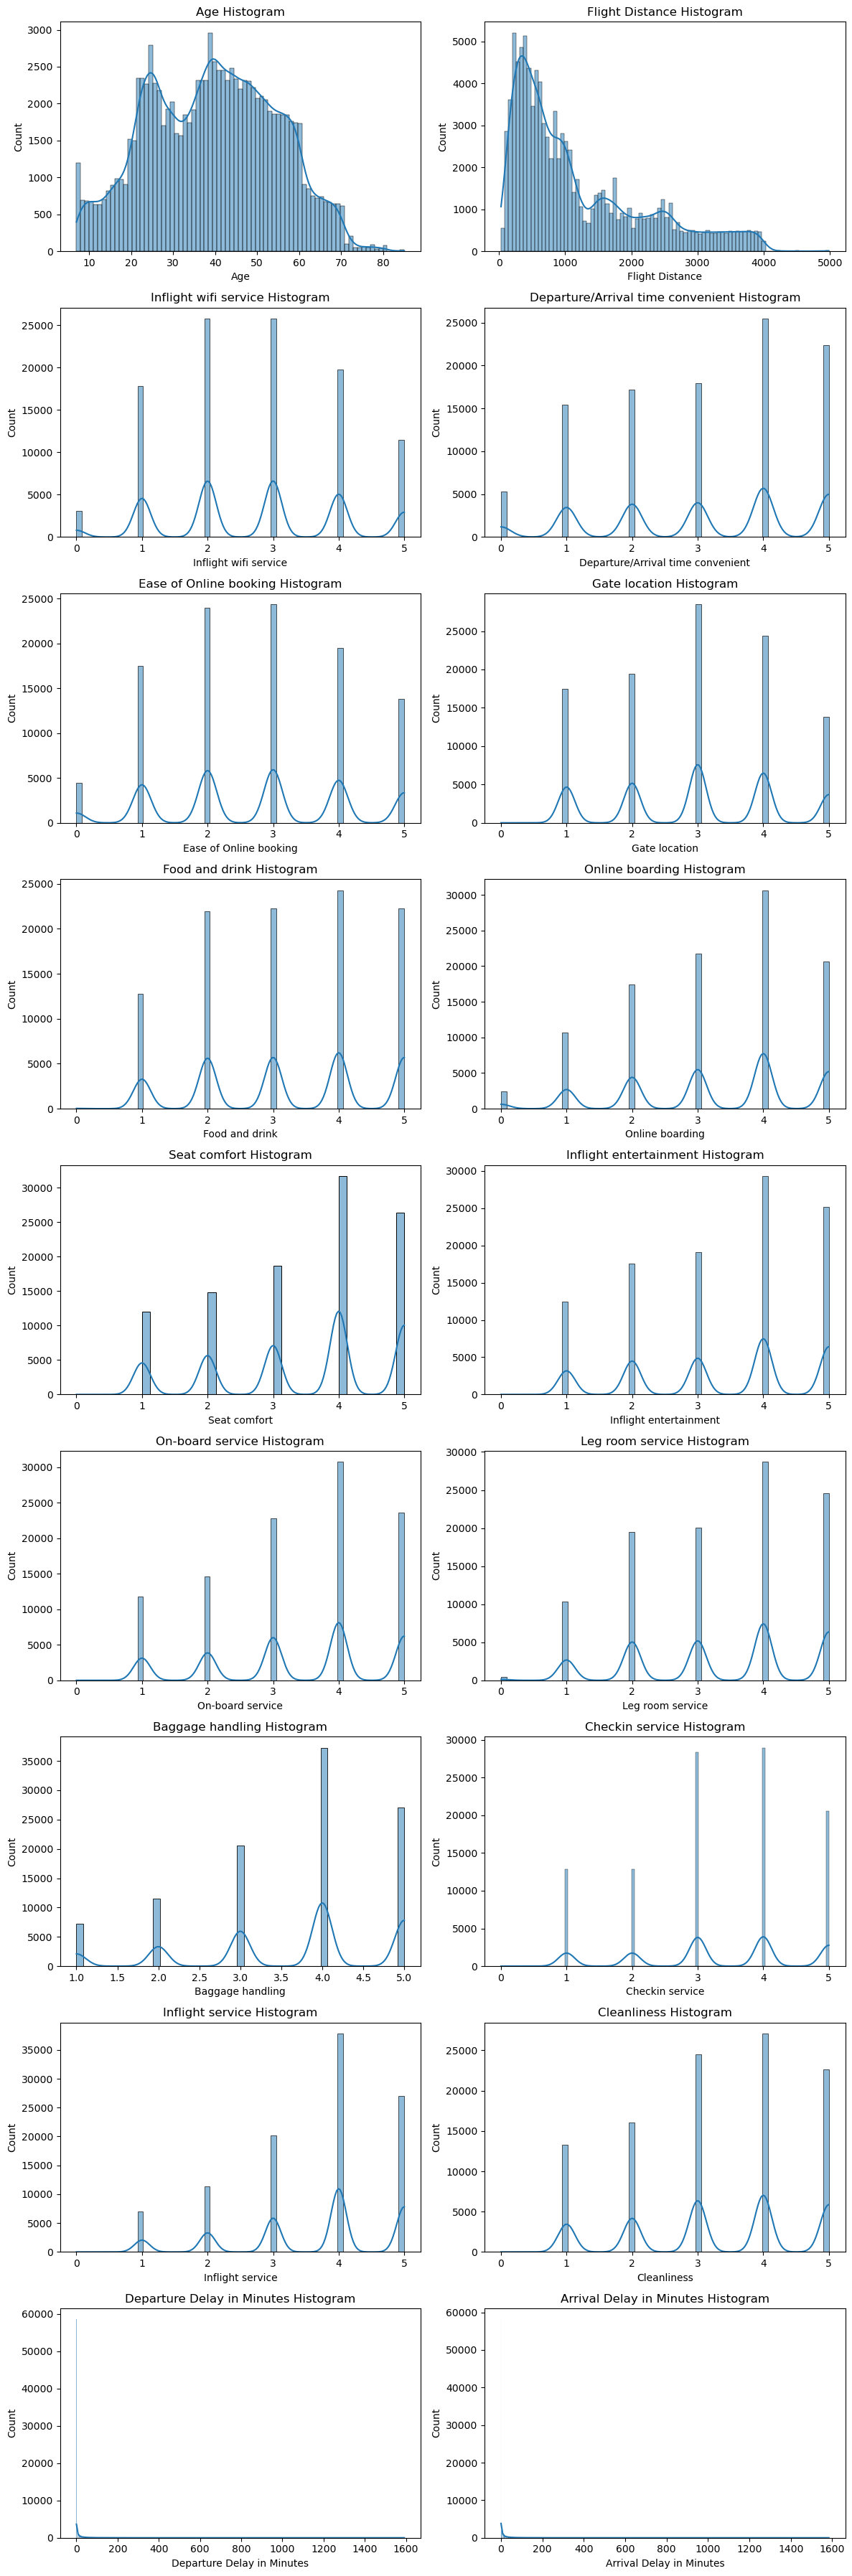

In [ ]:
# id sütunu analiz dışı bırakıldı
num_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'id' in num_cols:
    num_cols.remove('id')

n = len(num_cols)
cols = 2
rows = math.ceil(n / cols)

plt.figure(figsize=(cols * 6, rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Histogram")
    plt.xlabel(col)

plt.tight_layout()
plt.show()




#### Ordinal Değişkenlerin Görselleştirilmesi
Veri setinde yer alan bazı değişkenler, 0 ila 5 arasında derecelendirilmiş puanlardan oluşmaktadır. Bu değişkenler, her ne kadar sayısal türde kodlanmış olsa da, aslında sıralı kategorik (ordinal) yapıya sahiptir. Bu nedenle, bu tür değişkenlerin dağılımını daha doğru yorumlayabilmek adına bar (count) plot görselleştirmeleri tercih edilmiştir.

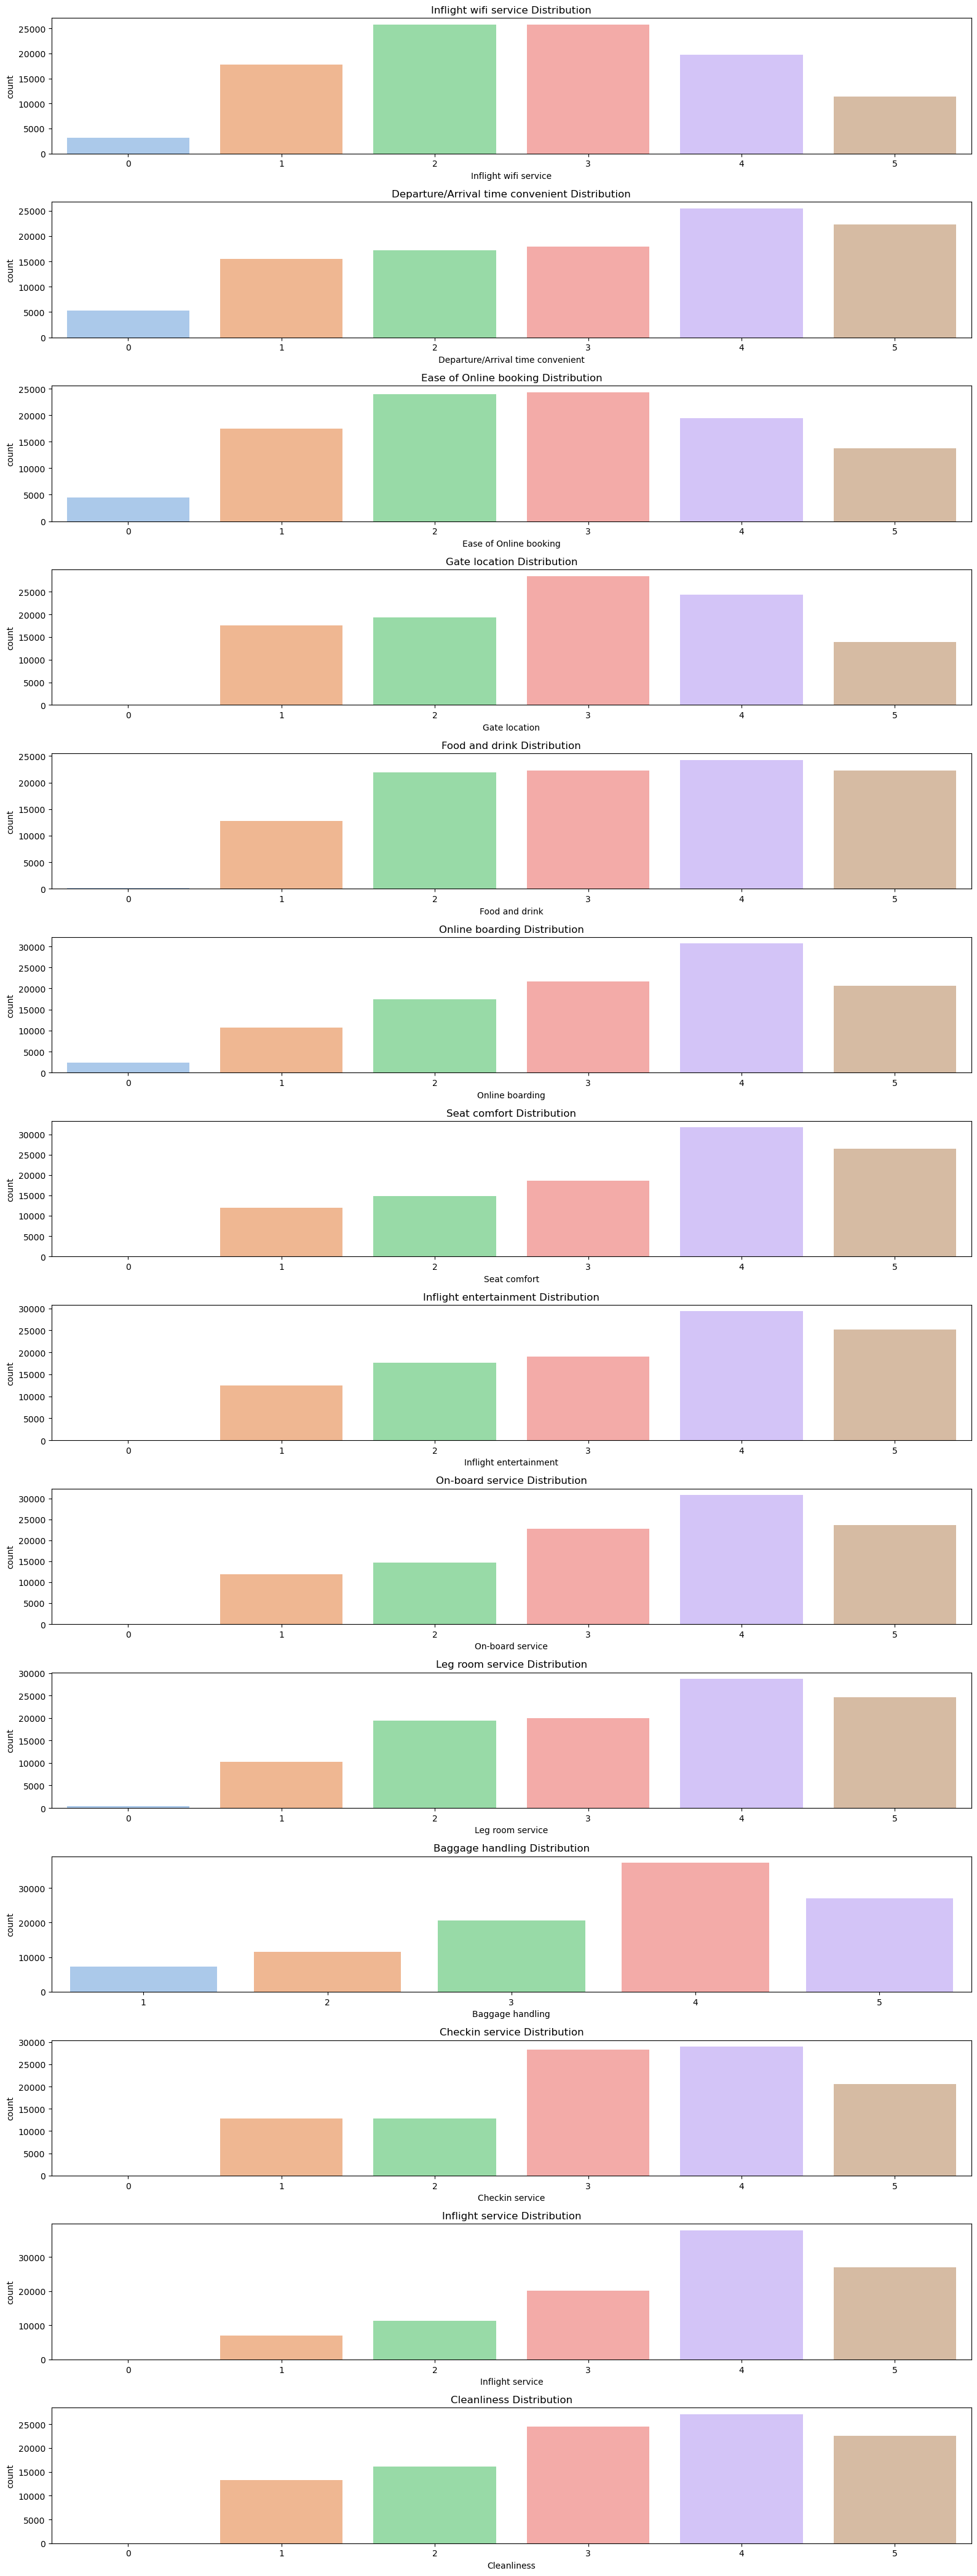

In [ ]:
ordinal_cols = [
    'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
    'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
    'Inflight entertainment', 'On-board service', 'Leg room service',
    'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness'
]

plt.figure(figsize=(16, len(ordinal_cols) * 3))
for i, col in enumerate(ordinal_cols, 1):
    plt.subplot(len(ordinal_cols), 1, i)
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f"{col} Distribution")
    plt.tight_layout()

plt.show()


#### Sayısal Değişkenler Arasındaki Korelasyon Analizi

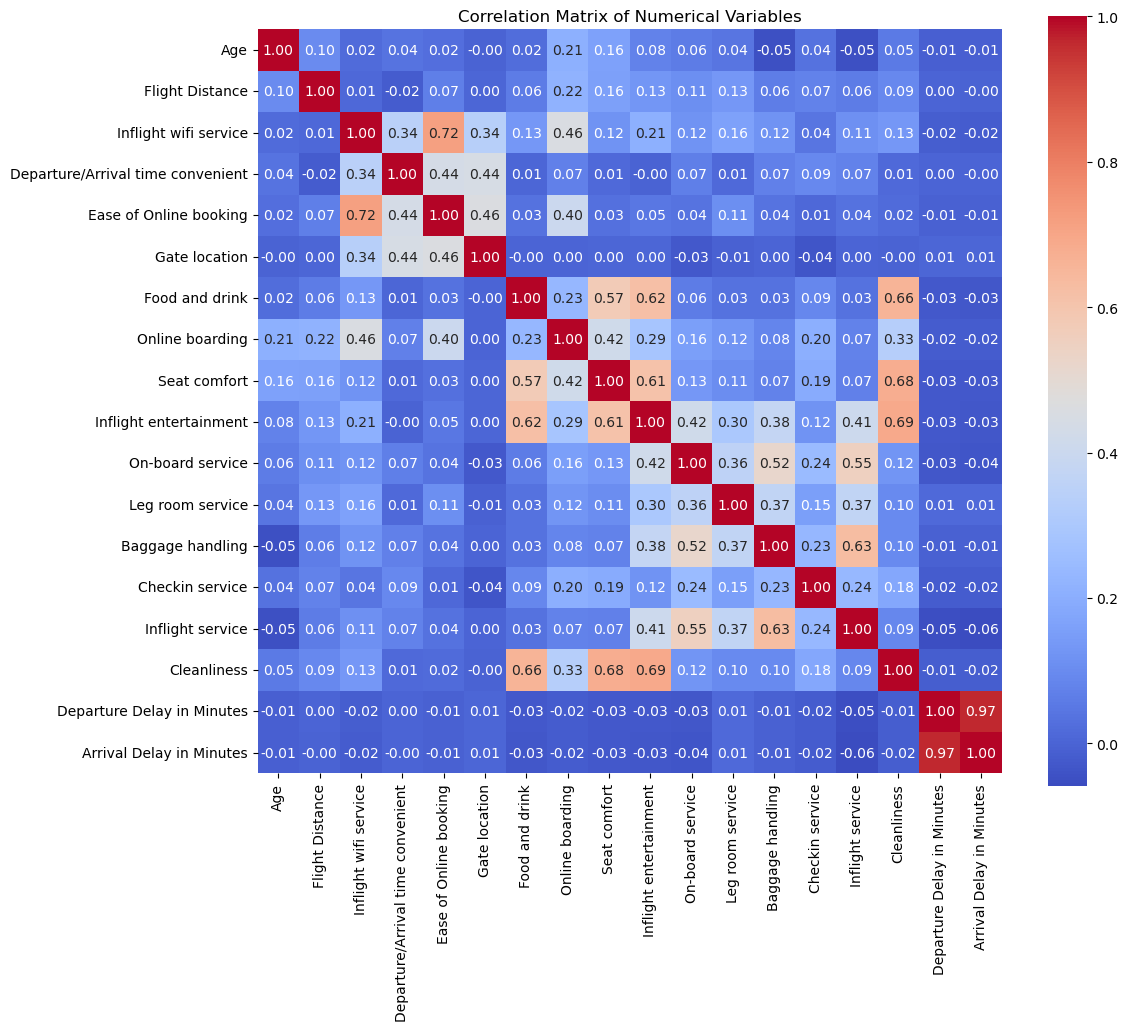

In [ ]:
plt.figure(figsize=(12, 10))
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()


### Yaşa Göre Memnuniyet Durumu

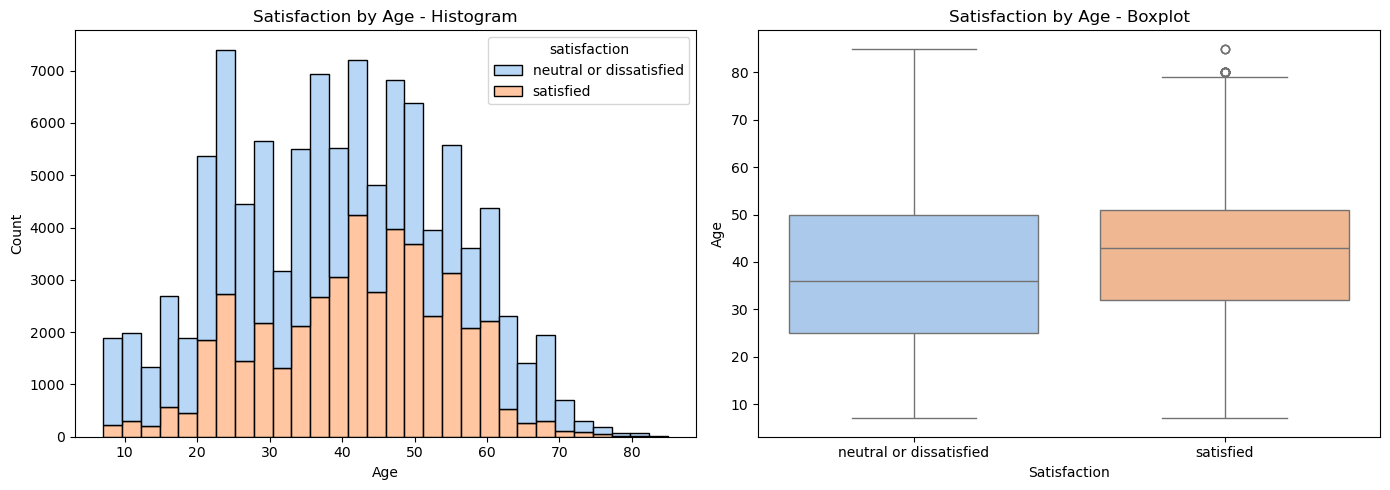

In [ ]:
plt.figure(figsize=(14, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="Age", hue="satisfaction", multiple="stack", palette="pastel", bins=30)
plt.title("Satisfaction by Age - Histogram")
plt.xlabel("Age")
plt.ylabel("Count")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="satisfaction", y="Age", palette="pastel")
plt.title("Satisfaction by Age - Boxplot")
plt.xlabel("Satisfaction")
plt.ylabel("Age")

plt.tight_layout()
plt.show()


Sonuç: Genç ve orta yaş grubundaki müşterilerde memnuniyetsizlik oranı daha yaygınken, daha olgun yaştaki müşterilerde memnuniyet bir miktar daha belirgindir.

### Uçuş Mesafesine Göre Memnuniyet Durumu

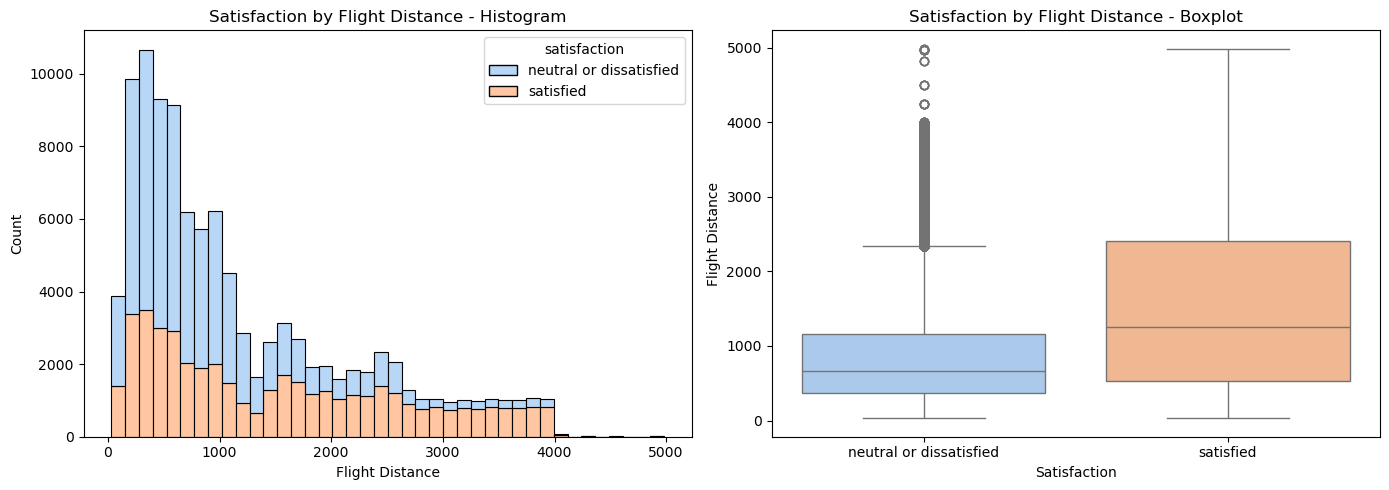

In [ ]:
plt.figure(figsize=(14, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="Flight Distance", hue="satisfaction", multiple="stack", palette="pastel", bins=40)
plt.title("Satisfaction by Flight Distance - Histogram")
plt.xlabel("Flight Distance")
plt.ylabel("Count")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="satisfaction", y="Flight Distance", palette="pastel")
plt.title("Satisfaction by Flight Distance - Boxplot")
plt.xlabel("Satisfaction")
plt.ylabel("Flight Distance")

plt.tight_layout()
plt.show()


Sonuç: Uçuş mesafesi, müşteri memnuniyetini etkileyen önemli bir faktördür; uzun mesafeli uçuşlar genellikle daha memnun müşterilerle sonuçlanırken, kısa mesafeli uçuşlarda memnuniyetsizlik oranı daha yüksektir.

### Müşteri Tipine Göre Memnuniyet Durumu

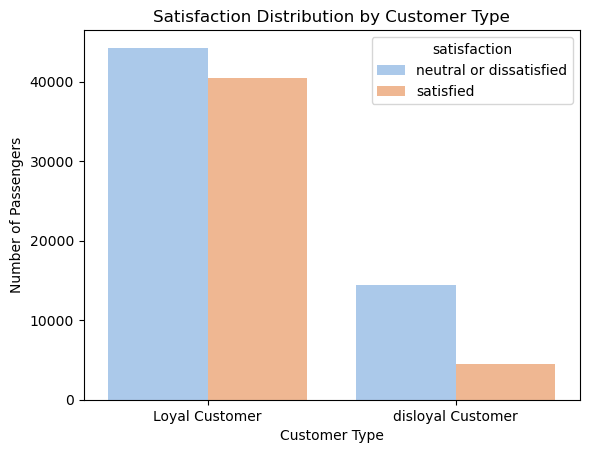

In [ ]:
sns.countplot(data=df, x="Customer Type", hue="satisfaction", palette="pastel")
plt.title("Satisfaction Distribution by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Number of Passengers")
plt.show()


Sonuç: Sadık (loyal) müşteriler arasında memnuniyet oranı oldukça yüksekken, sadık olmayan (disloyal) müşterilerde memnuniyetsizlik oranı daha fazladır. Bu durum, müşteri sadakatinin memnuniyetle doğrudan ilişkili olduğunu ve sadık müşterilerin hizmetten daha olumlu etkilendiğini göstermektedir.

### Uçuş Sınıfına Göre Memnuniyet Durumu

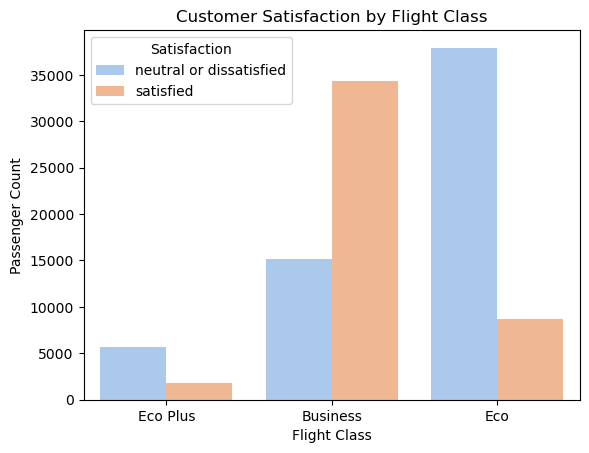

In [ ]:
sns.countplot(data=df, x="Class", hue="satisfaction", palette="pastel")
plt.title("Customer Satisfaction by Flight Class")
plt.xlabel("Flight Class")
plt.ylabel("Passenger Count")
plt.legend(title="Satisfaction")
plt.show()


Sonuç: Business sınıfı yolcuların büyük çoğunluğu memnuniyet gösterirken, Eco ve Eco Plus sınıflarında memnuniyetsizlik oranı daha yüksektir. Bu durum, uçuş konforunun ve hizmet kalitesinin sınıfa göre farklılaştığını ve müşteri memnuniyetini etkilediğini göstermektedir.

### Seyahat Tipine Göre Memnuniyet Durumu

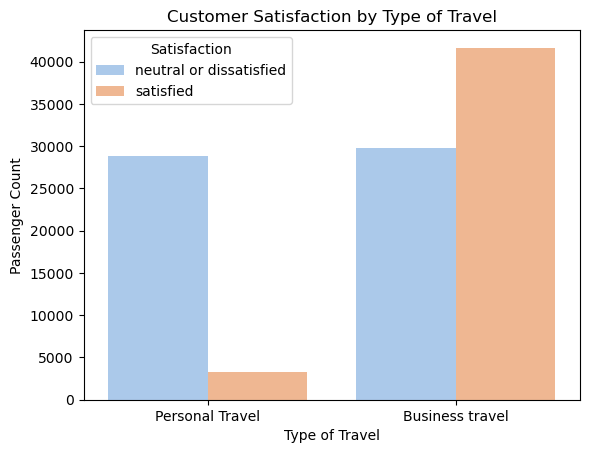

In [ ]:
sns.countplot(data=df, x="Type of Travel", hue="satisfaction", palette="pastel")
plt.title("Customer Satisfaction by Type of Travel")
plt.xlabel("Type of Travel")
plt.ylabel("Passenger Count")
plt.legend(title="Satisfaction")
plt.show()


Sonuç: İş seyahati yapan yolcular yüksek oranda memnuniyet gösterirken, kişisel seyahatlerde memnuniyetsizlik oranı daha yüksektir.